## Data Industry Jobs 

## Questions

- States With Most Numbers of Jobs
- States with Average Annual Minimal and Maximal Salaries in the States
- Average Salary in Different States
- Top 5 Industries with Maximum Number of Data Science Related Job Postings
- Top 5 Industries with Average Annual Minimal and Maximal Salaries
- Companies with Maximum Number of Job Openings
- What should I learn in 2022 ?
- Most Demanded Skills for Data Sciences

In [101]:
using CSV, DataFrames, CategoricalArrays, Gadfly, StatsPlots, Plots

In [102]:
ENV["LINES"] = 1000

1000

In [103]:
data = CSV.read("data.csv", DataFrame);

In [104]:
names(data)

42-element Vector{String}:
 "index"
 "Job Title"
 "Salary Estimate"
 "Job Description"
 "Rating"
 "Company Name"
 "Location"
 "Headquarters"
 "Size"
 "Founded"
 "Type of ownership"
 "Industry"
 "Sector"
 "Revenue"
 "Competitors"
 "Hourly"
 "Employer provided"
 "Lower Salary"
 "Upper Salary"
 "Avg Salary(K)"
 "company_txt"
 "Job Location"
 "Age"
 "Python"
 "spark"
 "aws"
 "excel"
 "sql"
 "sas"
 "keras"
 "pytorch"
 "scikit"
 "tensor"
 "hadoop"
 "tableau"
 "bi"
 "flink"
 "mongo"
 "google_an"
 "job_title_sim"
 "seniority_by_title"
 "Degree"

In [107]:
ENV["COLUMNS"] = 1000

1000

In [108]:
describe(data)

42×7 DataFrame
 Row │ variable            mean       min                                median  max                                nmissing  eltype   
     │ Symbol              Union…     Any                                Union…  Any                                Int64     DataType 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ index               469.129    0                                  472.5   955                                       0  Int64
   2 │ Job Title                      Ag Data Scientist                          Web Data Analyst                          0  String
   3 │ Salary Estimate                $10-$17 Per Hour(Glassdoor est.)           Employer Provided Salary:$85K-$9…         0  String
   4 │ Job Description                (We are unable to sponsor for th…          \uad\uadMissile Systems provides…         0  String
   5 │ Rating              3.61887    -1.0                               3.7     5.0                                       0  Float64
   6 │ Company Name                   1-800-FLOWERS.COM, Inc.\n2.8               webfx.com\n4.7                            0  String
   7 │ Location                       Agoura Hills, CA                           Worcester, MA                             0  String
   8 │ Headquarters                   -1                                         Zurich, Switzerland                       0  String31
   9 │ Size                           1 - 50                                     unknown                                   0  String15
  10 │ Founded             1837.15    -1                                 1988.0  2019                                      0  Int64
  11 │ Type of ownership              College / University                       Subsidiary or Business Segment            0  String31
  12 │ Industry                       -1                                         Wholesale                                 0  String
  13 │ Sector                         -1                                         Travel & Tourism                          0  String
  14 │ Revenue                        $1 to $2 billion (USD)                     Unknown / Non-Applicable                  0  String
  15 │ Competitors                    -1                                         eClinicalWorks, NextGen Healthca…         0  String
  16 │ Hourly              0.032345   0                                  0.0     1                                         0  Int64
  17 │ Employer provided   0.0229111  0                                  0.0     1                                         0  Int64
  18 │ Lower Salary        74.7547    15                                 69.5    202                                       0  Int64
  19 │ Upper Salary        128.214    16                                 124.0   306                                       0  Int64
  20 │ Avg Salary(K)       101.485    15.5                               97.5    254.0                                     0  Float64
  21 │ company_txt                    1-800-FLOWERS.COM, Inc.                    webfx.com                                 0  String
  22 │ Job Location                   AL                                         WI                                        0  String3
  23 │ Age                 47.5243    -1                                 25.0    277                                       0  Int64
  24 │ Python              0.528302   0                                  1.0     1                                         0  Int64
  25 │ spark               0.225067   0                                  0.0     1                                         0  Int64
  26 │ aws                 0.237197   0                                  0.0     1                                         0  Int64
  27 │ excel               0.522911   0                                  1.0     1                                      

In [109]:
 collect(any(ismissing, c) for c in eachcol(data));

In [110]:
mapcols(x -> any(ismissing, x), data)

1×42 DataFrame
 Row │ index  Job Title  Salary Estimate  Job Description  Rating  Company Name  Location  Headquarters  Size   Founded  Type of ownership  Industry  Sector  Revenue  Competitors  Hourly  Employer provided  Lower Salary  Upper Salary  Avg Salary(K)  company_txt  Job Location  Age    Python  spark  aws    excel  sql    sas    keras  pytorch  scikit  tensor  hadoop  tableau  bi     flink  mongo  google_an  job_title_sim  seniority_by_title  Degree 
     │ Bool   Bool       Bool             Bool             Bool    Bool          Bool      Bool          Bool   Bool     Bool               Bool      Bool    Bool     Bool         Bool    Bool               Bool          Bool          Bool           Bool         Bool          Bool   Bool    Bool   Bool   Bool   Bool   Bool   Bool   Bool     Bool    Bool    Bool    Bool     Bool   Bool   Bool   Bool       Bool           Bool                Bool   
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ false      false            false            false   false         false     false         false  false    false              false     false   false    false        false   false              false         false         false          false        false         false  false   false  false  false  false  false  false  false    false   false   false   false    false  false  false  false      false          false               false   false

In [111]:
rename!(data, Dict(:"Avg Salary(K)" => :"avg_salary",
                   :"Lower Salary" => :"lwr_salary",
                   :"Upper Salary" => :"upr_salary",
                   :"Salary Estimate" => :"salary_estimate",
                   :"Job Location" => :"jb_lcsn",
                   :"Job Title" => :"jb_title",
                   :"Employer provided" => :"employer_provd",
                   :"Type of ownership" => :"type_owner",
                   :"Company Name" => :"company_name"));

In [112]:
n, p = size(data)

(742, 42)

In [113]:
data[!, :job_title_sim]

742-element PooledArrays.PooledVector{String31, UInt32, Vector{UInt32}}:
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data engineer"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data scientist"
 "data scientist"
 "data engineer"
 "analyst"
 "data engineer"
 "data scientist"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data 

In [71]:
unique(data[!, :job_title_sim])

10-element Vector{String31}:
 "data scientist"
 "other scientist"
 "analyst"
 "data engineer"
 "data analitics"
 "na"
 "data modeler"
 "Data scientist project manager"
 "machine learning engineer"
 "director"

In [114]:
unique(data[!, :salary_estimate])

416-element Vector{String}:
 "\$53K-\$91K (Glassdoor est.)"
 "\$63K-\$112K (Glassdoor est.)"
 "\$80K-\$90K (Glassdoor est.)"
 "\$56K-\$97K (Glassdoor est.)"
 "\$86K-\$143K (Glassdoor est.)"
 "\$71K-\$119K (Glassdoor est.)"
 "\$54K-\$93K (Glassdoor est.)"
 "\$86K-\$142K (Glassdoor est.)"
 "\$38K-\$84K (Glassdoor est.)"
 "\$120K-\$160K (Glassdoor est.)"
 "\$126K-\$201K (Glassdoor est.)"
 "\$64K-\$106K (Glassdoor est.)"
 "\$106K-\$172K (Glassdoor est.)"
 "\$46K-\$85K (Glassdoor est.)"
 "\$83K-\$144K (Glassdoor est.)"
 "\$102K-\$190K (Glassdoor est.)"
 "\$67K-\$137K (Glassdoor est.)"
 "\$118K-\$189K (Glassdoor est.)"
 "\$110K-\$175K (Glassdoor est.)"
 "\$64K-\$111K (Glassdoor est.)"
 "\$81K-\$130K (Glassdoor est.)"
 "\$73K-\$119K (Glassdoor est.)"
 "\$86K-\$139K (Glassdoor est.)"
 "\$63K-\$105K (Glassdoor est.)"
 "\$109K-\$177K (Glassdoor est.)"
 "\$63K-\$110K (Glassdoor est.)"
 "\$75K-\$124K (Glassdoor est.)"
 "\$34K-\$61K (Glassdoor est.)"
 "\$72K-\$120K (Glassdoor est.)"
 "\$93K-\$149K 

In [115]:
unique(data[!, :avg_salary])

219-element Vector{Float64}:
  72.0
  87.5
  85.0
  76.5
 114.5
  95.0
  73.5
 114.0
  61.0
 140.0
 163.5
 139.0
  65.5
 113.5
 146.0
 102.0
 153.5
 142.5
 105.5
  96.0
 112.5
  84.0
 143.0
  86.5
  99.5
  47.5
 121.0
 106.0
 107.0
 110.0
 147.5
  88.0
  98.5
  82.5
 130.0
 155.0
 184.5
  29.5
  81.0
  91.0
  68.0
 115.0
 109.5
  75.5
 154.5
 143.5
 139.5
  67.0
 118.0
  79.5
  56.5
 128.5
  97.5
  66.5
 179.5
  76.0
 112.0
  98.0
 128.0
 150.5
 124.0
  77.5
  87.0
  53.5
  85.5
  48.0
 174.0
 106.5
  72.5
  99.0
 133.0
 237.5
  95.5
 104.5
  55.0
  61.5
 157.0
  78.0
 132.5
 108.0
  80.5
 107.5
 119.5
 134.0
 100.5
 122.0
  92.5
  62.0
  39.5
  40.5
  89.5
 147.0
  81.5
 168.0
  97.0
 100.0
 105.0
 103.5
 137.5
  84.5
 164.0
 169.0
 142.0
 171.5
 145.0
  42.0
 120.0
  71.5
  51.5
 151.5
 225.0
 161.5
 124.5
 148.0
  59.0
 146.5
  91.5
 140.5
  70.5
  93.5
 134.5
 181.0
 205.0
  48.5
  44.5
  52.5
  64.0
  54.0
  89.0
  65.0
  41.5
  79.0
  69.0
  49.0
  88.5
  96.5
  15.5
  83.5
 163.

In [72]:
unique(data[!, :Location])

200-element Vector{String}:
 "Albuquerque, NM"
 "Linthicum, MD"
 "Clearwater, FL"
 "Richland, WA"
 "New York, NY"
 "Dallas, TX"
 "Baltimore, MD"
 "San Jose, CA"
 "Rochester, NY"
 "Chantilly, VA"
 "Plano, TX"
 "Seattle, WA"
 "Cambridge, MA"
 "Newark, NJ"
 "Mountain View, CA"
 "San Francisco, CA"
 "Denver, CO"
 "Chicago, IL"
 "Louisville, KY"
 "Herndon, VA"
 "Hillsboro, OR"
 "Worcester, MA"
 "Groton, CT"
 "Detroit, MI"
 "Sunnyvale, CA"
 "Ipswich, MA"
 "Redlands, CA"
 "Woburn, MA"
 "Fremont, CA"
 "Long Beach, NY"
 "Marlborough, MA"
 "Allendale, NJ"
 "Washington, DC"
 "Bellevue, WA"
 "Longmont, CO"
 "Beavercreek, OH"
 "Peoria, IL"
 "Fort Lauderdale, FL"
 "Boston, MA"
 "Huntsville, AL"
 "Armonk, NY"
 "San Diego, CA"
 "Saint Louis, MO"
 "Cincinnati, OH"
 "Palo Alto, CA"
 "Coraopolis, PA"
 "Framingham, MA"
 "Atlanta, GA"
 "Philadelphia, PA"
 "Vancouver, WA"
 "Indianapolis, IN"
 "Lake Forest, IL"
 "Maryland Heights, MO"
 "Charlottesville, VA"
 "Pittsburgh, PA"
 "Harrisburg, PA"
 "Laurel, MD"
 

In [73]:
unique(data[!, :seniority_by_title])

3-element Vector{String3}:
 "na"
 "sr"
 "jr"

In [74]:
unique(data[!, :lwr_salary])

113-element Vector{Int64}:
  53
  63
  80
  56
  86
  71
  54
  38
 120
 126
  64
 106
  46
  83
 102
  67
 118
 110
  81
  73
 109
  75
  34
  72
  93
  85
  77
  82
 115
  74
  68
  52
 150
 158
  20
  41
 111
  84
 107
  49
  61
  88
  60
  96
  65
 139
  50
  99
  79
  57
  94
  37
 100
  55
  39
  31
 117
  40
  89
 200
 121
  76
  91
  95
  43
  29
  26
 112
  51
 113
  59
  44
 124
 131
 132
  35
  42
 116
  48
 105
  98
 114
 108
  90
 138
 190
  69
  66
  33
  62
  15
 127
  78
  45
  70
 130
  92
  36
  97
 202
  32
  87
 101
 125
  47
 176
 135
 129
 119
  27
  58
 136
 171

In [75]:
unique(data[!, :Competitors	])

128-element Vector{String}:
 "-1"
 "Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory"
 "Commerce Signals, Cardlytics, Yodlee"
 "Digital Realty, CoreSite, Equinix"
 "Clicktripz, SmarterTravel"
 "Target, Costco Wholesale, Amazon"
 "Novartis, Baxter, Pfizer"
 "bluebird bio, Agios Pharmaceuticals, Celgene"
 "Angie's List, HomeAdvisor, Thumbtack"
 "Leidos, CACI International, Booz Allen Hamilton"
 "Thermo Fisher Scientific, Enzymatics, Illumina"
 "Pitney Bowes"
 "BrowserStack, Selenium Master, Perfecto Mobile"
 "Unilever, Procter & Gamble, Henkel"
 "UDR, AvalonBay Communities, Essex Property Trust"
 "American Express, Mastercard, Discover"
 "TASC, Vencore, Booz Allen Hamilton"
 "John Deere, Komatsu, CNH Industrial"
 "Travelers, Allstate, State Farm"
 "Munich Re, Hannover RE, SCOR"
 "Skyhigh Networks, Zscaler, NortonLifeLock"
 "Slalom, Daugherty Business Solutions"
 "REI, Academy Sports + Outdoors, Cabela's"
 "IDEO, Gongos, Inc., Ipsos"
 "ManTech, 

In [76]:
unique(data[!, :Revenue])

13-element Vector{String}:
 "\$50 to \$100 million (USD)"
 "\$2 to \$5 billion (USD)"
 "\$100 to \$500 million (USD)"
 "\$500 million to \$1 billion (USD)"
 "Unknown / Non-Applicable"
 "\$1 to \$2 billion (USD)"
 "\$25 to \$50 million (USD)"
 "\$10+ billion (USD)"
 "\$1 to \$5 million (USD)"
 "\$10 to \$25 million (USD)"
 "\$5 to \$10 billion (USD)"
 "Less than \$1 million (USD)"
 "\$5 to \$10 million (USD)"

In [77]:
unique(data[!, :Sector])

25-element Vector{String}:
 "Aerospace & Defense"
 "Health Care"
 "Business Services"
 "Oil, Gas, Energy & Utilities"
 "Real Estate"
 "Finance"
 "Information Technology"
 "Retail"
 "Biotech & Pharmaceuticals"
 "Media"
 "Insurance"
 "Transportation & Logistics"
 "Telecommunications"
 "-1"
 "Manufacturing"
 "Mining & Metals"
 "Government"
 "Education"
 "Agriculture & Forestry"
 "Travel & Tourism"
 "Non-Profit"
 "Arts, Entertainment & Recreation"
 "Construction, Repair & Maintenance"
 "Accounting & Legal"
 "Consumer Services"

In [78]:
unique(data[!, :company_name])

343-element Vector{String}:
 "Tecolote Research\n3.8"
 "University of Maryland Medical System\n3.4"
 "KnowBe4\n4.8"
 "PNNL\n3.8"
 "Affinity Solutions\n2.9"
 "CyrusOne\n3.4"
 "ClearOne Advantage\n4.1"
 "Logic20/20\n3.8"
 "Rochester Regional Health\n3.3"
 "<intent>\n4.6"
 "Wish\n3.5"
 "ManTech\n4.1"
 "Walmart\n3.2"
 "Yesler\n4.1"
 "Takeda Pharmaceuticals\n3.7"
 "Audible\n3.6"
 "Blueprint Medicines\n3.9"
 "h2o.ai\n4.3"
 "Nuna\n4.2"
 "Pinnacol Assurance\n4.0"
 "Porch\n3.2"
 "Health IQ\n3.9"
 "Truckstop.com\n3.8"
 "SMC 3\n4.3"
 "Novetta\n4.0"
 "Pfizer\n4.0"
 "First Tech Federal Credit Union\n3.5"
 "The Hanover Insurance Group\n3.7"
 "Amrock\n3.6"
 "Novartis\n3.8"
 "Juniper Networks\n3.8"
 "New England Biolabs\n4.7"
 "Clarity Insights\n4.2"
 "Esri\n3.5"
 "Systems & Technology Research\n4.7"
 "Sartorius\n3.5"
 "Lancer Insurance\n3.5"
 "Sauce Labs\n4.2"
 "Persivia\n3.6"
 "Edgewell Personal Care\n3.4"
 "Equity Residential\n4.3"
 "BPA Services\n5.0"
 "Visa Inc.\n3.7"
 "Intrado\n3.1"
 "Centauri\n

In [79]:
unique(data[!, :Degree])

3-element Vector{String3}:
 "M"
 "na"
 "P"

In [30]:
levels(data[!, :job_title_sim])

10-element Vector{String31}:
 "Data scientist project manager"
 "analyst"
 "data analitics"
 "data engineer"
 "data modeler"
 "data scientist"
 "director"
 "machine learning engineer"
 "na"
 "other scientist"

In [31]:
levels(data[!, :job_title_sim])

10-element Vector{String31}:
 "Data scientist project manager"
 "analyst"
 "data analitics"
 "data engineer"
 "data modeler"
 "data scientist"
 "director"
 "machine learning engineer"
 "na"
 "other scientist"

In [32]:
levels(data[!, :Rating])

31-element Vector{Float64}:
 -1.0
  1.9
  2.1
  2.2
  2.3
  2.4
  2.5
  2.6
  2.7
  2.8
  2.9
  3.0
  3.1
  3.2
  3.3
  3.4
  3.5
  3.6
  3.7
  3.8
  3.9
  4.0
  4.1
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  5.0

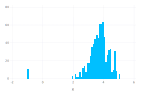

In [33]:
Gadfly.plot(x=data[!, :Rating], Geom.histogram)

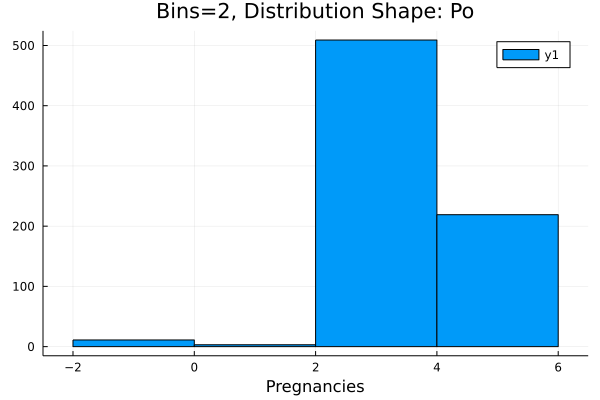

In [34]:
h1 = Plots.histogram(data[!, :Rating], bins = 5, xlabel = "Pregnancies", title = "Bins=2, Distribution Shape: Po")

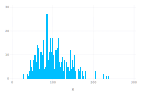

In [35]:
Gadfly.plot(x=data[!, :avg_salary], Geom.histogram)

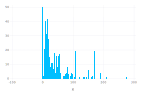

In [36]:
Gadfly.plot(x=data[!, :Age], Geom.histogram)

In [37]:
using DataStructures,  StatsBase
d = sort(countmap(data[!, :job_title_sim]), byvalue=true, rev=true)

OrderedDict{String31, Int64} with 10 entries:
  "data scientist"                 => 313
  "other scientist"                => 143
  "data engineer"                  => 119
  "analyst"                        => 101
  "machine learning engineer"      => 22
  "Data scientist project manager" => 16
  "na"                             => 10
  "data analitics"                 => 8
  "data modeler"                   => 5
  "director"                       => 5

## Job Titles with Most Number of Jobs

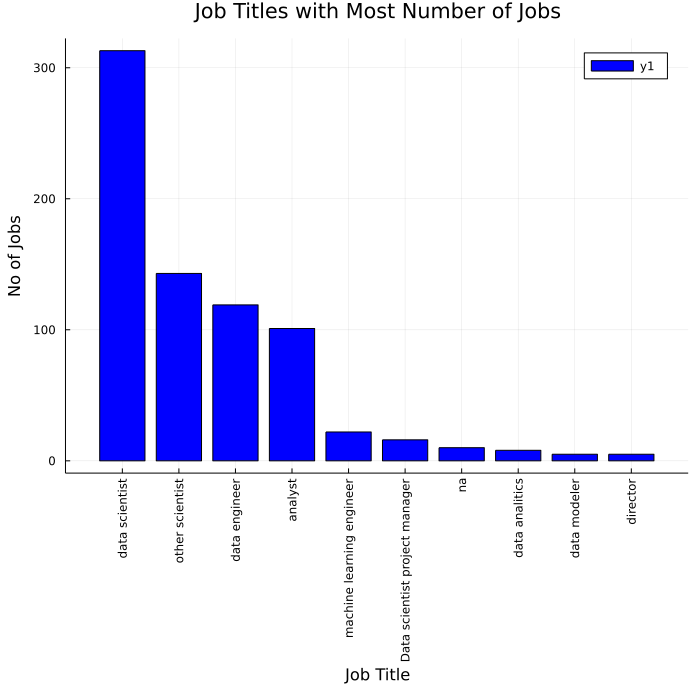

In [38]:
b = bar(d, xrotation=90, size = (700, 700), title = "Job Titles with Most Number of Jobs", xlabel = "Job Title",
    ylabel = "No of Jobs",  color = :blue)

In [39]:
savefig(b,"jb_title.png")

In [40]:
d1 = sort(countmap(data[!, :Sector]), byvalue=true, rev=true)
p1 = Dict(first(d1, 10))

Dict{String, Int64} with 10 entries:
  "Health Care"               => 49
  "Finance"                   => 42
  "Aerospace & Defense"       => 25
  "Manufacturing"             => 34
  "Education"                 => 23
  "Insurance"                 => 69
  "Retail"                    => 15
  "Information Technology"    => 180
  "Biotech & Pharmaceuticals" => 112
  "Business Services"         => 97

## Top 10 Sectors for Data Science

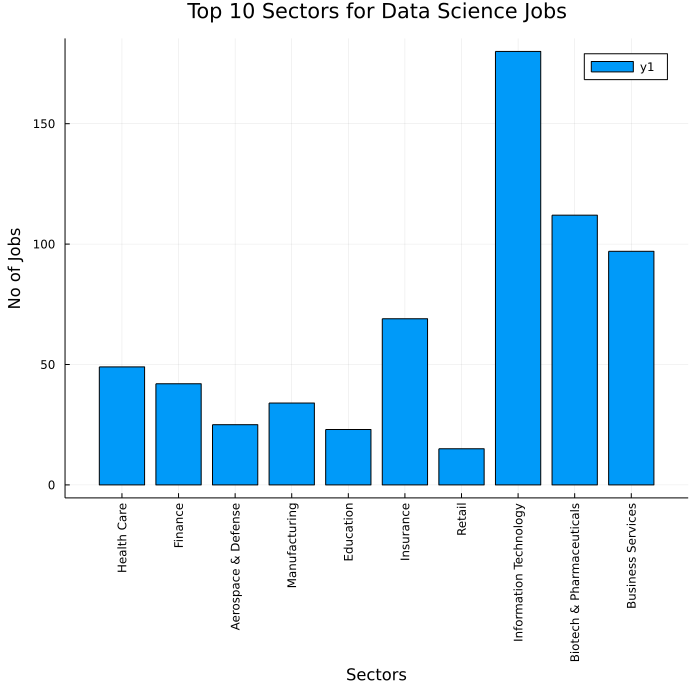

In [41]:
b1 = bar(p1, xrotation=90, size = (700, 700), title = "Top 10 Sectors for Data Science Jobs", xlabel = "Sectors",
    ylabel = "No of Jobs")

In [42]:
savefig(b1,"jb_sector.png")

In [43]:
d2 = sort(countmap(data[!, :jb_lcsn]), byvalue=true, rev=true)
p2 = Dict(first(d2, 10))

Dict{String3, Int64} with 10 entries:
  "WA" => 21
  "CA" => 152
  "NC" => 21
  "MA" => 103
  "NY" => 72
  "VA" => 41
  "PA" => 33
  "TX" => 28
  "IL" => 40
  "MD" => 35

## States With Most Numbers of Jobs

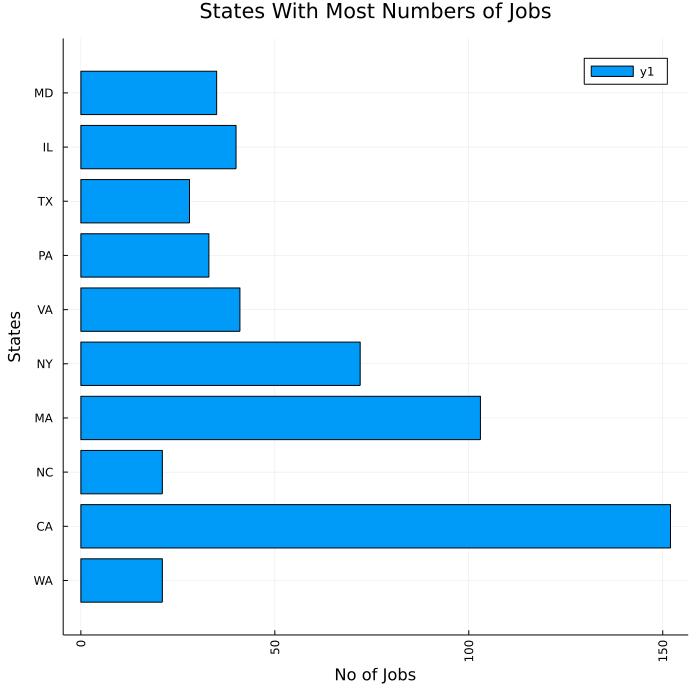

In [44]:
b2 = bar(p2, xrotation=90, size = (700, 700), orientation=:h, title = "States With Most Numbers of Jobs", xlabel = "No of Jobs",
    ylabel = "States")

In [45]:
savefig(b2,"jb_states.png")

In [46]:
d3 = sort(countmap(data[!, :Industry]), byvalue=true, rev=true)
p3 = Dict(first(d3, 5))

Dict{String, Int64} with 5 entries:
  "IT Services"                      => 50
  "Computer Hardware & Software"     => 59
  "Health Care Services & Hospitals" => 49
  "Insurance Carriers"               => 63
  "Biotech & Pharmaceuticals"        => 112

In [47]:
s = [
   "IT Services",                     
  "Computer Hardware & Software" ,    
  "Health Care Services & Hospitals", 
  "Insurance Carriers",               
  "Biotech & Pharmaceuticals",        
]

5-element Vector{String}:
 "IT Services"
 "Computer Hardware & Software"
 "Health Care Services & Hospitals"
 "Insurance Carriers"
 "Biotech & Pharmaceuticals"

## Top 10 Sectors for Data Science Related Jobs

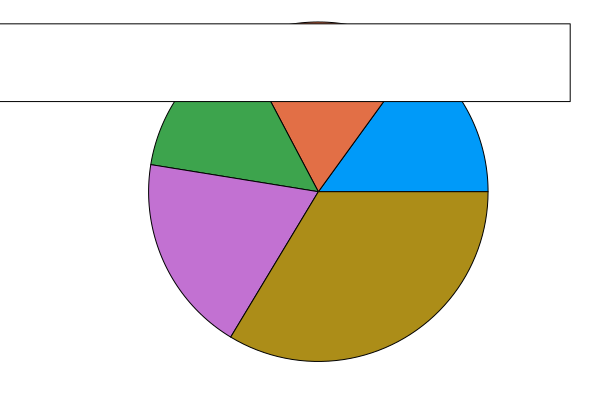

GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT


In [199]:
Plots.pie((x -> p3[x]).(s), labels=s, shadow=true)

In [200]:
  s1 = [ "WA", 
    "CA",
    "NC", 
    "MA", 
    "NY", 
    "VA", 
    "PA", 
    "TX", 
    "IL", 
    "MD"]

10-element Vector{String}:
 "WA"
 "CA"
 "NC"
 "MA"
 "NY"
 "VA"
 "PA"
 "TX"
 "IL"
 "MD"

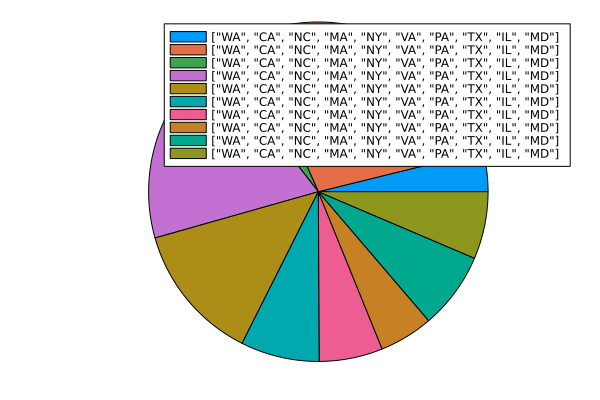

In [201]:
Plots.pie((x -> p2[x]).(s1), labels=s1, shadow=true)

In [48]:
d4 = sort(countmap(data[!, :company_name]), byvalue=true, rev=true)
p4 = Dict(first(d4, 10))


Dict{String, Int64} with 10 entries:
  "MITRE\n3.2"                          => 8
  "AstraZeneca\n3.9"                    => 9
  "Novartis\n3.8"                       => 7
  "Reynolds American\n3.1"              => 14
  "Liberty Mutual Insurance\n3.3"       => 10
  "Takeda Pharmaceuticals\n3.7"         => 14
  "Pfizer\n4.0"                         => 7
  "PNNL\n3.8"                           => 10
  "MassMutual\n3.6"                     => 14
  "Software Engineering Institute\n2.6" => 11

## Top 10 Companies With Maximum Number of Job Post

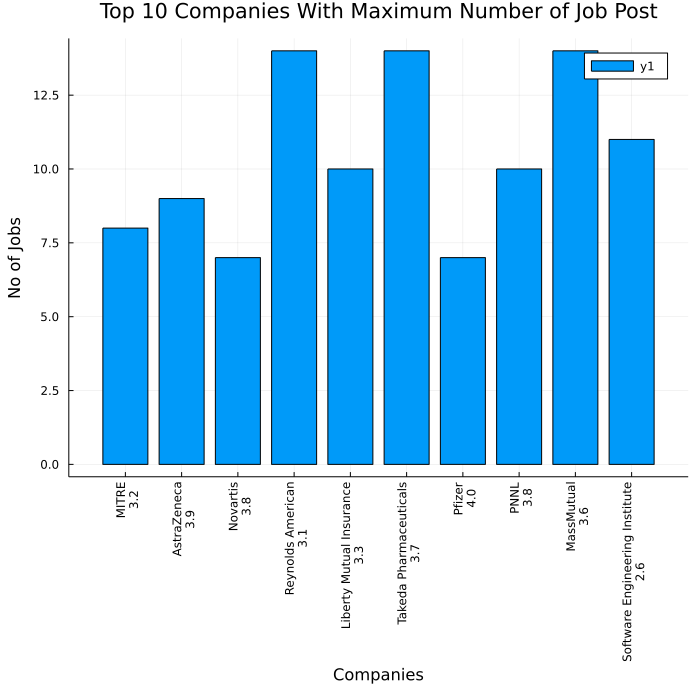

In [49]:
b4 = bar(p4, xrotation=90, size = (700, 700), orientation=:v, title = "Top 10 Companies With Maximum Number of Job Post", xlabel = "Companies", ylabel = "No of Jobs")

In [50]:
savefig(b4,"jb_companies.png")

In [140]:
countmap(data[!, :jb_lcsn])

Dict{String3, Int64} with 37 entries:
  "AZ" => 9
  "DC" => 11
  "IA" => 5
  "NM" => 3
  "RI" => 1
  "NJ" => 17
  "DE" => 6
  "NE" => 4
  "MD" => 35
  "KS" => 3
  "MI" => 6
  "AL" => 8
  "MO" => 9
  "FL" => 16
  "ID" => 2
  "CO" => 11
  "UT" => 10
  "CA" => 152
  "WI" => 10
  "NY" => 72
  "MN" => 2
  "KY" => 6
  "SC" => 1
  "OH" => 14
  "GA" => 6
  "WA" => 21
  "TN" => 13
  "CT" => 5
  "NC" => 21
  "TX" => 28
  "VA" => 41
  "MA" => 103
  "OR" => 4
  "PA" => 33
  "IN" => 10
  "IL" => 40
  "LA" => 4

In [141]:
levels(data[!, :jb_lcsn])

37-element Vector{String3}:
 "AL"
 "AZ"
 "CA"
 "CO"
 "CT"
 "DC"
 "DE"
 "FL"
 "GA"
 "IA"
 "ID"
 "IL"
 "IN"
 "KS"
 "KY"
 "LA"
 "MA"
 "MD"
 "MI"
 "MN"
 "MO"
 "NC"
 "NE"
 "NJ"
 "NM"
 "NY"
 "OH"
 "OR"
 "PA"
 "RI"
 "SC"
 "TN"
 "TX"
 "UT"
 "VA"
 "WA"
 "WI"

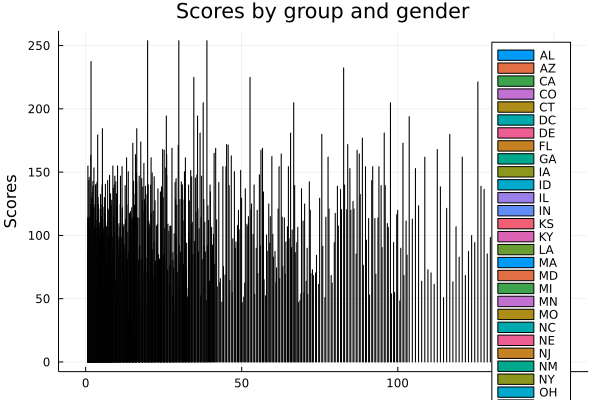

In [172]:
groupedbar(data[!,:avg_salary], group = data[!,:jb_lcsn], ylabel = "Scores", title = "Scores by group and gender")

In [173]:
groupedbar(group=data[!,:jb_lcsn]

LoadError: syntax: incomplete: premature end of input

In [142]:
s = ["AL", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "MI", "MN", "MO", "NC", "NE", "NJ", "NM", "NY", "OH", "OR", "PA", "RI", "SC", "TN", "TX", "UT", "VA", "WA", "WI"];
sz = size(s)

(37,)

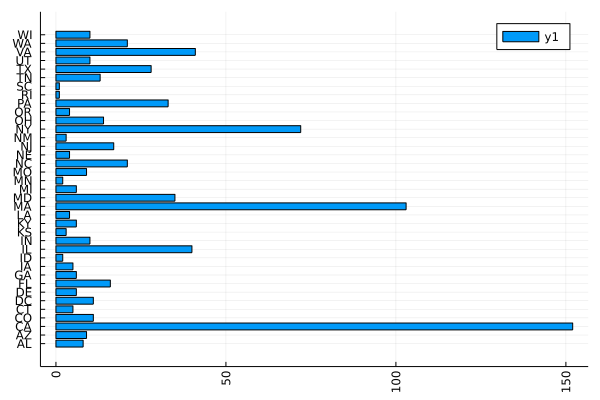

In [143]:
datamap = countmap(data[!, :jb_lcsn])
q = bar((x -> datamap[x]).(s), yticks=(1:37, s), xrotation=90, orientation=:h)

In [84]:
using PlotlyJS

WebIO._IJuliaInit()

In [88]:
PlotlyJS.plot(data, x=:jb_lcsn, y=:avg_salary, kind="bar")

data: [
  "bar with fields type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, xaxis, and yaxis"

In [83]:
datamap1 = countmap(data[!, :job_title_sim])

@df data groupedhist(:avg_salary, group = :Degree, bar_position = :dodge)

LoadError: UndefVarError: extractGroupArgs not defined

In [ ]:
q = bar(countmap(data[!, :jb_lcsn]), xrotation=90, orientation=:h)

In [47]:
groupedbar(data[!, :lwr_salary], data[!, :upr_salary], bar_position = :dodge, bar_width=0.7)

LoadError: BoundsError: attempt to access Tuple{Int64} at index [2]

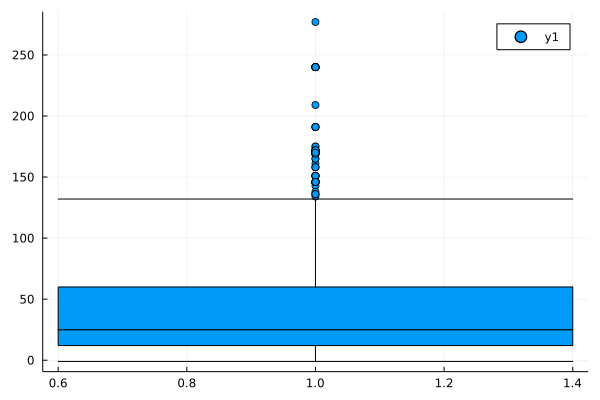

In [46]:
 StatsPlots.boxplot(data[!, :Age])

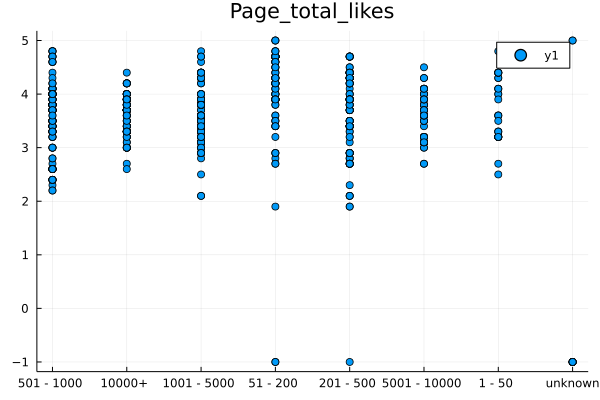

In [135]:

p1 = scatter(data[!,:Size], data[!,:Rating], title = "Page_total_likes")


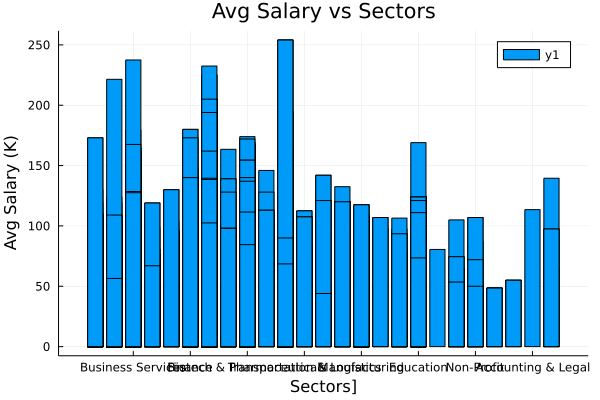

In [136]:
p = bar(data[!, :Sector], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")


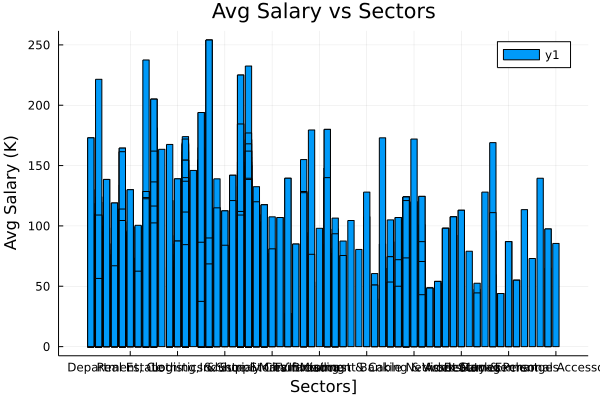

In [137]:
p = bar(data[!, :Industry], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")

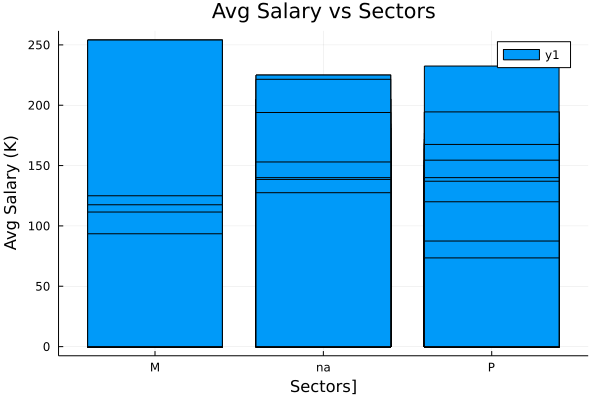

In [138]:
p = bar(data[!, :Degree], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")

In [139]:
unique(data[!, :Hourly])

2-element Vector{Int64}:
 0
 1

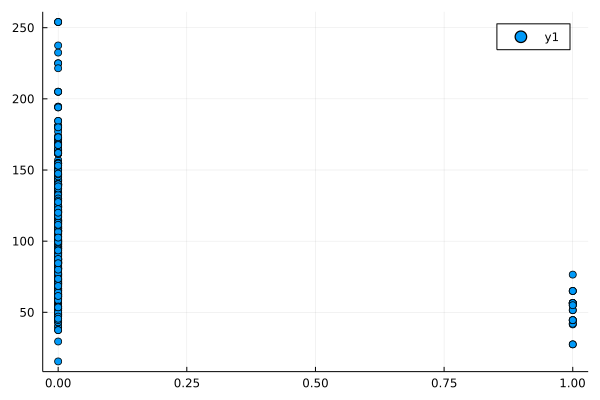

In [140]:
using Plots
Plots.plot(data[!,:Hourly], data[!,:avg_salary], seriestype = :scatter)

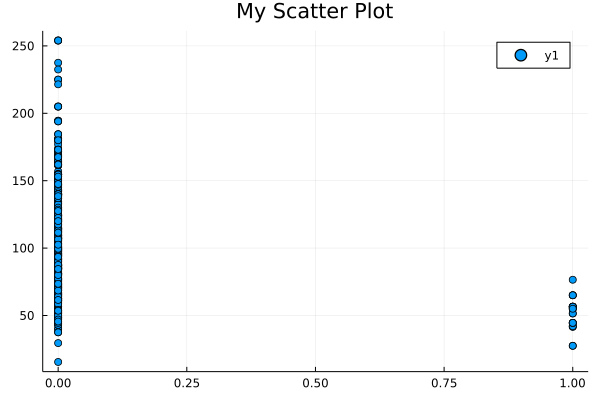

In [141]:
scatter(data[!,:Hourly], data[!,:avg_salary], title = "My Scatter Plot")

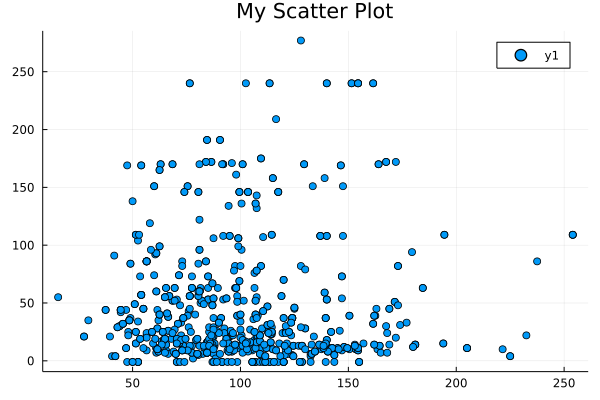

In [142]:
scatter(data[!,:avg_salary], data[!,:Age], title = "My Scatter Plot")

In [143]:
using MLJ
traindf, testdf = partition(data, 0.7, shuffle=true); # 70:30 split

In [ ]:
# m1 = @formula(avg_salary~Rating+Size+Hourly+Python+Age+Revenue+seniority_by_title+Degree+lwr_salary+upr_salary)
# R2 = 1.0

In [93]:
using GLM, RegressionTables
m1 = @formula(avg_salary~Rating+Size+Hourly+Python+Age+Revenue+seniority_by_title+Degree+lwr_salary+upr_salary+jb_lcsn+Sector+Industry)

FormulaTerm
Response:
  avg_salary(unknown)
Predictors:
  Rating(unknown)
  Size(unknown)
  Hourly(unknown)
  Python(unknown)
  Age(unknown)
  Revenue(unknown)
  seniority_by_title(unknown)
  Degree(unknown)
  lwr_salary(unknown)
  upr_salary(unknown)
  jb_lcsn(unknown)
  Sector(unknown)
  Industry(unknown)

In [91]:
model1 = lm(m1, traindf)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

avg_salary ~ 1 + Rating + Size + Hourly + Python + Age + Revenue + seniority_by_title + Degree + lwr_salary + upr_salary + jb_lcsn + Sector

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                   Coef.   Std. Error                   t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                                  9.75096e-12  5.87485e-13               16.60    <1e-47   8.59626e-12   1.09057e-11
Rating                                      -2.42753e-13  3.98347e-14               -6.09    <1e-08  -3.21048e-13  -1.64458e-13
Size: 10000+               

In [92]:
# R Square value of the model
r2(model1)

1.0

In [96]:
# predicted values
pred1 = GLM.predict(model1)
# residuals
red1 = traindf[!, :avg_salary] - pred1;

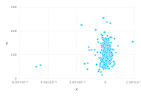

In [97]:
# homoscedasticity Assumption 
Gadfly.plot(x=red1,y=pred1, Geom.point)

### Here the variance is almost same in different X value, However there are milder violation, so homoscedasticity assumption is about to OK

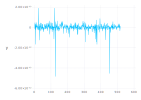

In [98]:
# Independence Assumption
Gadfly.plot(y=red1, Geom.line)

### All the observations look random, So the independent assumption hold

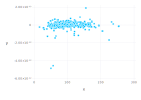

In [100]:
# Exogeneity assumption
Gadfly.plot(x = traindf[!, :avg_salary], y=red1)

### We observed some pattern over the plot, so the Epsilon captured some information with was left out previously. It violating the assumption & might missed some idependent varaiable

In [121]:
m2 = @formula(avg_salary~Rating+Size+Hourly+Python+Age+Revenue+seniority_by_title+Degree+lwr_salary+upr_salary+jb_lcsn+Sector+Industry+jb_title+Founded+employer_provd+Competitors+Headquarters)

FormulaTerm
Response:
  avg_salary(unknown)
Predictors:
  Rating(unknown)
  Size(unknown)
  Hourly(unknown)
  Python(unknown)
  Age(unknown)
  Revenue(unknown)
  seniority_by_title(unknown)
  Degree(unknown)
  lwr_salary(unknown)
  upr_salary(unknown)
  jb_lcsn(unknown)
  Sector(unknown)
  Industry(unknown)
  jb_title(unknown)
  Founded(unknown)
  employer_provd(unknown)
  Competitors(unknown)
  Headquarters(unknown)

In [122]:
model2 = lm(m2, traindf)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

avg_salary ~ 1 + Rating + Size + Hourly + Python + Age + Revenue + seniority_by_title + Degree + lwr_salary + upr_salary + jb_lcsn + Sector + Industry + jb_title + Founded + employer_provd + Competitors + Headquarters

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                  Coef.     Std. Error                t  Pr(>|t|)      Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)  

In [123]:
# R Square value of the model
r2(model2)

1.0

In [124]:
# predicted values
pred2 = GLM.predict(model2)
# residuals
red2 = traindf[!, :avg_salary] - pred2;

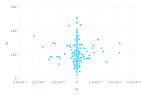

In [125]:
# homoscedasticity Assumption 
Gadfly.plot(x=red2,y=pred2, Geom.point)

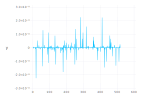

In [126]:
# Independence Assumption
Gadfly.plot(y=red2, Geom.line)

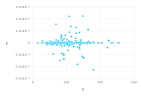

In [127]:
# Exogeneity assumption
Gadfly.plot(x = traindf[!, :avg_salary], y=red2)

In [128]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [129]:
model1_test = lm(m1, testdf)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

avg_salary ~ 1 + Rating + Size + Hourly + Python + Age + Revenue + seniority_by_title + Degree + lwr_salary + upr_salary + jb_lcsn + Sector + Industry

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                          Coef.     Std. Error                   t  Pr(>|t|)      Lower 95%      Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                                        -7.2751e-13     8.32709e-13               -0.87    0.3840   -2.37594e-12    9.2092e-13
Rating                                             -1.93711e-14    8.22481e-14               -0.24   

In [130]:
pred_test = GLM.predict(model1_test)

223-element Vector{Float64}:
 100.49999999999993
  52.50000000000004
 147.99999999999983
  52.50000000000004
 177.00000000000023
 116.49999999999997
 112.49999999999989
  87.50000000000004
  47.00000000000005
  47.000000000000185
  98.49999999999994
 107.49999999999996
  59.99999999999975
 111.50000000000009
 129.99999999999972
 122.00000000000048
 120.49999999999977
  58.50000000000014
 120.0
  60.50000000000051
  63.50000000000031
 149.50000000000037
 114.50000000000009
 184.4999999999997
  41.9999999999998
 120.49999999999991
  89.5000000000003
  37.500000000000085
  74.00000000000004
 136.99999999999997
 104.50000000000004
 161.5000000000002
  93.50000000000028
  96.00000000000064
 142.5000000000001
 139.99999999999932
 124.49999999999997
 101.0000000000002
 111.00000000000026
  93.50000000000003
  64.99999999999999
 138.5000000000003
 140.5
  71.49999999999955
 154.99999999999977
  94.99999999999996
  76.49999999999993
  94.50000000000043
 109.00000000000026
 127.49999999999991
 1

In [133]:
performance_testdf = DataFrame(y_actual = testdf[!,:avg_salary], y_predicted = pred_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error


223-element Vector{Float64}:
 5.0487097934144756e-27
 1.8175355256292112e-27
 2.908056841006738e-26
 1.8175355256292112e-27
 5.169878828456423e-26
 8.077935669463161e-28
 1.2924697071141057e-26
 1.8175355256292112e-27
 2.473867798773093e-27
 3.4129278203481855e-26
 3.2311742677852644e-27
 1.8175355256292112e-27
 6.184669496932733e-26
 7.270142102516845e-27
 8.077935669463161e-26
 2.3345234084748535e-25
 5.169878828456423e-26
 2.0194839173657902e-26
 0.0
 2.617251156906064e-25
 9.774302160050425e-26
 1.3651711281392742e-25
 7.270142102516845e-27
 9.774302160050425e-26
 3.958188478036949e-26
 7.270142102516845e-27
 8.905924075583135e-26
 7.270142102516845e-27
 1.8175355256292112e-27
 8.077935669463161e-28
 1.8175355256292112e-27
 3.958188478036949e-26
 8.077935669463161e-26
 4.089454932665725e-25
 1.2924697071141057e-26
 4.652890945610781e-25
 8.077935669463161e-28
 3.958188478036949e-26
 6.54312789226516e-26
 8.077935669463161e-28
 2.0194839173657902e-28
 9.774302160050425e-26
 0.0
 2.0

In [134]:
println("Root mean square test error: ",rmse(performance_testdf), "\n")

Root mean square test error: 3.238756488855286e-13



In [ ]:
"Job Title"
 "Salary Estimate"
 "Job Description"
 "Rating"
 "Company Name"
 "Location"
 "Headquarters"
 "Size"
 "Founded"
 "Type of ownership"
 "Industry"
 "Sector"
 "Revenue"
 "Competitors"
 "Hourly"
 "Employer provided"
 "Lower Salary"
 "Upper Salary"
 "Avg Salary(K)"
 "company_txt"
 "Job Location"
 "Age"
 "Python"
 "spark"
 "aws"
 "excel"
 "sql"
 "sas"
 "keras"
 "pytorch"
 "scikit"
 "tensor"
 "hadoop"
 "tableau"
 "bi"
 "flink"
 "mongo"
 "google_an"
 "job_title_sim"
 "seniority_by_title"
 "Degree"

In [116]:
unique(data[!, :Founded])

102-element Vector{Int64}:
 1973
 1984
 2010
 1965
 1998
 2000
 2008
 2005
 2014
 2009
 2011
 1968
 1962
 2012
 1781
 1995
 1915
 2013
 1935
 1849
 1952
 1852
 1997
 1996
 1974
 1969
 1870
 1985
   -1
 2015
 1993
 1958
 1986
 1999
 1925
 1912
 2002
 1863
 1939
 2016
 1885
 2006
 1948
 2003
 1927
 1978
 1860
 2017
 1942
 1990
 1988
 2001
 2007
 1992
 1994
 1977
 2019
 1982
 1937
 1878
 1966
 1971
 1943
 1987
 1945
 1846
 1851
 1976
 1981
 1970
 1951
 1967
 1961
 1964
 1930
 1917
 1883
 1887
 2004
 1850
 1902
 1744
 1929
 1947
 1991
 1989
 1928
 1875
 1913
 1972
 1856
 1983
 1922
 1812
 1914
 1980
 1954
 1830
 1975
 1899
 1979
 1889